In [1]:
import pandas as pd

In [2]:
filename = './data/Meant to be--2024-07-28 16_27_11.csv'
df = pd.read_csv(filename, encoding='utf-8')
df.head()

,username,comment,comment_time,like_counts
0,Evithur,爱可以跨越永恒，期待和各位拓荒者在亚夏大陆相见，一起寻找希望探索美好！,2020年6月16日,(660)
1,凉邪君,歌曲依旧好听，游戏慢慢变好，唯一依旧烂着的就是op的素质,2022年8月3日,(535)
2,我怀里有个十香,原神太飘了，必须要有限制，希望你游会是下一个战双，当然，不是诅咒开服炸服也来个黑卡事件，而是...,2020年6月17日,(404)
3,彡笙丶歌丿,幻塔唯一的贡献就是这曲子还不错，游戏是真的拉胯,2021年12月20日,(368)
4,嘉心糖们今天吃什么,据我所知，刚开始，幻塔只是完美旗下的一个小工作室出品的游戏，在2018年立项，他们没有优良的...,2022年5月3日,(324)


In [3]:
# 数据清洗


# 根据username和comment这列识别删除重复行，直接在df上修改，保留最后一个出现的重复项
df.drop_duplicates(subset=['username','comment'], inplace=True, keep='first') 
# 缺失值较少，直接删去
# print(df['comment'].isnull().value_counts())
df = df.dropna(subset=['comment'])

df.head()

,username,comment,comment_time,like_counts
0,Evithur,爱可以跨越永恒，期待和各位拓荒者在亚夏大陆相见，一起寻找希望探索美好！,2020年6月16日,(660)
1,凉邪君,歌曲依旧好听，游戏慢慢变好，唯一依旧烂着的就是op的素质,2022年8月3日,(535)
2,我怀里有个十香,原神太飘了，必须要有限制，希望你游会是下一个战双，当然，不是诅咒开服炸服也来个黑卡事件，而是...,2020年6月17日,(404)
3,彡笙丶歌丿,幻塔唯一的贡献就是这曲子还不错，游戏是真的拉胯,2021年12月20日,(368)
4,嘉心糖们今天吃什么,据我所知，刚开始，幻塔只是完美旗下的一个小工作室出品的游戏，在2018年立项，他们没有优良的...,2022年5月3日,(324)


In [4]:
# 数据预处理


# 以年月日形式规范时间
def handle_comment_time(comment_time):
    this_year = '2024年'
    today_time = '2024年7月28日'
    yesterday_time = '2024年7月27日'
    # 处理一个小时内的评论
    if ':' not in comment_time and '日' not in comment_time:
        comment_time = today_time
    # 处理今天的评论
    elif ':' in comment_time and '天' not in comment_time and '日' not in comment_time:
        comment_time = today_time
    # 处理昨天的评论
    elif ':' in comment_time and '天' in comment_time:
        comment_time = yesterday_time
    # 处理今年的评论    
    elif '年' not in comment_time:
        comment_time = this_year + comment_time.split()[0]
    return pd.to_datetime(comment_time, format='%Y年%m月%d日')

def handle_like_counts(like_count):
    return like_count.strip('()')

df['comment_time_standard'] = df['comment_time'].apply(handle_comment_time)
df['year_month'] = df['comment_time_standard'].dt.strftime('%Y-%m')
df['like_counts'] = df['like_counts'].apply(handle_like_counts).astype(int)
df = df.sort_values(by='comment_time_standard').reset_index(drop=True)
df.head()

,username,comment,comment_time,like_counts,comment_time_standard,year_month
0,编制一场梦,这首歌好棒,2020年6月11日,0,2020-06-11,2020-06
1,陈希2,前排,2020年6月11日,0,2020-06-11,2020-06
2,大本钟声,前排 好听呢 单曲循环呢,2020年6月11日,0,2020-06-11,2020-06
3,Starlight98,太好听了！！！cqa最棒！！！,2020年6月11日,3,2020-06-11,2020-06
4,小星同学0,好赞👍🏻,2020年6月11日,1,2020-06-11,2020-06


In [5]:
import pyecharts
import pyecharts.options as opts
from pyecharts.charts import Line,Grid
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy
from PIL import Image

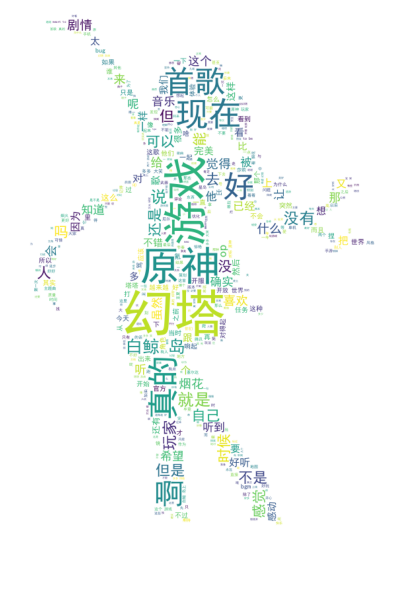

In [13]:
comment_word_str = df['comment'].str.cat(sep=' ')
comment_word_cut = ' '.join(jieba.cut(comment_word_str, cut_all=False))


# # 查看分词统计结果
# word_count = Counter(list(comment_word_cut.split()))
# word_data = list(word_count.items())
# word_data = sorted(word_data, key=lambda x: x[1], reverse=True)
# print(word_data)


with open('stop_word.txt','r',encoding='utf-8') as r_f:
    stop_words = set(r_f.read().splitlines())
# print(stop_words)

mask = numpy.array(Image.open('莎莉.png'))


#创建词云对象，设置词云的一些属性
wordcloud=WordCloud(
    stopwords=stop_words,
    mask=mask,
    mode='RGBA',
    font_path='simhei.ttf',
    background_color="white", #设置背景颜色
    max_words=600, #最多显示的词数
    max_font_size=150, #字体最大值
    margin=2 #设置词与词之间的距离
).generate(comment_word_cut)

plt.figure(figsize=(16,8),facecolor=None)#创建一个16x8的绘图对象
plt.imshow(wordcloud)
plt.axis("off") #不显示坐标轴
plt.tight_layout(pad=0) # 调整子图参数，使之填充整个图像区域
plt.show()#显示图像


wordcloud.to_file("莎莉_wordcloud.png")#保存为图片

In [11]:
month_counts = list(df['year_month'].value_counts().sort_index().items())

comment_month,comment_month_counts = zip(*month_counts)


comment_line=(
    Line(init_opts=opts.InitOpts(theme="dark", width="800px", height="450px"))
    .add_xaxis(xaxis_data=comment_month)
    .add_yaxis(series_name="网易云音乐 Meant to be",y_axis=comment_month_counts, is_smooth=True)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="月评论数"),
        toolbox_opts=opts.ToolboxOpts(is_show=True),
            
        datazoom_opts=[
            opts.DataZoomOpts(
                is_realtime=True,
                type_="slider",
                start_value=30,
                end_value=70,
            )
        ],
    )

)

comment_line.render_notebook() # 在notebook中显示 
# comment_line.render("comment_line_chart.html")  #保存到本地

In [9]:
month_like_counts = df.groupby('year_month')['like_counts'].sum().reset_index()
month_comment_counts = df['year_month'].value_counts().sort_index()
combined_df = pd.merge(month_like_counts, month_comment_counts, on='year_month', how='outer')
# 填充缺失值
combined_df = combined_df.fillna(0)
month, like_counts, comment_counts = zip(*combined_df.values.tolist())


l1 = (
    Line()
    .add_xaxis(xaxis_data=month)
    .add_yaxis(
        series_name="评论数",
        y_axis=comment_counts,
        symbol_size=8,
        is_hover_animation=False,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=1.5),
        is_smooth=True,
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="网易云音乐 Meant to be", pos_left="center"
        ),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        axispointer_opts=opts.AxisPointerOpts(
            is_show=True, link=[{"xAxisIndex": "all"}]
        ),
        datazoom_opts=[
            opts.DataZoomOpts(
                is_show=True,
                is_realtime=True,
                start_value=30,
                end_value=70,
                xaxis_index=[0, 1],
            )
        ],
        xaxis_opts=opts.AxisOpts(
            type_="category",
            boundary_gap=False,
            axisline_opts=opts.AxisLineOpts(is_on_zero=True),
        ),
        yaxis_opts=opts.AxisOpts(name="月评论数"),
        legend_opts=opts.LegendOpts(pos_left="left"),
        toolbox_opts=opts.ToolboxOpts(
            is_show=True,
            feature={
                "dataZoom": {"yAxisIndex": "none"},
                "restore": {},
                "saveAsImage": {},
            },
        ),
    )
)

l2 = (
    Line()
    .add_xaxis(xaxis_data=month)
    .add_yaxis(
        series_name="点赞数",
        y_axis=like_counts,
        xaxis_index=1,
        yaxis_index=1,
        symbol_size=8,
        is_hover_animation=False,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=1.5),
        is_smooth=True,
    )
    .set_global_opts(
        axispointer_opts=opts.AxisPointerOpts(
            is_show=True, link=[{"xAxisIndex": "[all]"}]
        ),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        xaxis_opts=opts.AxisOpts(
            grid_index=1,
            type_="category",
            boundary_gap=False,
            axisline_opts=opts.AxisLineOpts(is_on_zero=True),
            position="top",
        ),
        datazoom_opts=[
            opts.DataZoomOpts(
                is_realtime=True,
                type_="inside",
                start_value=30,
                end_value=70,
                xaxis_index=[0, 1],
            )
        ],
        yaxis_opts=opts.AxisOpts(is_inverse=True, name="月点赞数"),
        legend_opts=opts.LegendOpts(pos_left="7%"),
    )
)

grid = (
    Grid(init_opts=opts.InitOpts(width="1024px", height="768px"))
    .add(chart=l1, grid_opts=opts.GridOpts(pos_left=50, pos_right=50, height="35%"))
    .add(
        chart=l2,
        grid_opts=opts.GridOpts(pos_left=50, pos_right=50, pos_top="55%", height="35%"),
    )
)
grid.render_notebook()
grid.render("grid_chart.html")

'E:\\python实战\\爬虫\\selenium\\爬取网易云评论\\grid_chart.html'